In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy
import math

df = pd.read_csv('data/mobile.csv', index_col=0)
print(len(df))
df.head()

400


,battery_power,clock_speed,four_g,int_memory,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range
0,1142,1.4,0,6,8,8,663,5,1,1,0
1,728,1.7,1,5,2,20,834,5,1,0,0
2,1868,0.5,1,40,8,17,298,17,1,0,0
3,890,2.2,0,44,8,13,751,3,0,0,0
4,1433,1.6,0,4,8,11,258,4,1,1,0


In [2]:
cols = ['battery_power', 'clock_speed', 'talk_time']

df_sub = df[cols]
df_sub.head()

,battery_power,clock_speed,talk_time
0,1142,1.4,5
1,728,1.7,5
2,1868,0.5,17
3,890,2.2,3
4,1433,1.6,4


## ranking standartization

In [3]:
diff = df_sub.max() - df_sub.min()
diff

battery_power    1495.0
clock_speed         2.5
talk_time          18.0
dtype: float64

In [4]:
df_norm = (df_sub - df_sub.min()).divide(diff)
df_norm.head()

,battery_power,clock_speed,talk_time
0,0.428094,0.36,0.166667
1,0.151171,0.48,0.166667
2,0.913712,0.00,0.833333
3,0.259532,0.68,0.055556
4,0.622742,0.44,0.111111


In [5]:
data_scatter = df_norm.multiply(df_norm).values.sum()
data_scatter

377.47480466092503

In [6]:
z, mu, c = np.linalg.svd(df_norm)
mu

array([17.20123172,  6.7003017 ,  6.05791955])

In [8]:
z.shape, mu.shape, c.shape

((400, 400), (3,), (3, 3))

## Contribution of principal components:

In [61]:
np.multiply(mu.T, mu)

array([295.88237256,  44.89404281,  36.69838929])

### in percent:

In [78]:
np.multiply(mu.T, mu) / data_scatter * 100

array([78.38466804, 11.89325546,  9.7220765 ])

## hidden factor

In [81]:
z = -z
c = -c
c[0,:]

array([0.59979566, 0.50652763, 0.61941499])

$$100=(0.599 * 100 + 0.506 * 100 + 0.619 * 100) * \alpha$$
$$ \alpha = 0.58$$

$$ Z = 0.347 * \text{batttery} + 0.293 * \text{clock} + 0.359 * \text{talk}$$

# Visualization

### range normalization

In [23]:
from matplotlib import pyplot as plt

cols = ['battery_power', 'clock_speed', 'talk_time']

df_sub = df[cols]
df_sub.head()

,battery_power,clock_speed,talk_time
0,1142,1.4,5
1,728,1.7,5
2,1868,0.5,17
3,890,2.2,3
4,1433,1.6,4


In [39]:
means = df_sub.mean()
diff = df_sub.max() - df_sub.min()
df_range = (df_sub - means) / diff
df_range.head()

,battery_power,clock_speed,talk_time
0,-0.056472,-0.0446,-0.333750
1,-0.333395,0.0754,-0.333750
2,0.429147,-0.4046,0.332917
3,-0.225033,0.2754,-0.444861
4,0.138177,0.0354,-0.389306


In [40]:
df_range['clock_speed'].max()

0.5953999999999996

In [41]:
z, mu, c = np.linalg.svd(df_range)

In [43]:
z1 = z[:,0] * np.sqrt(mu[0])
z2 = z[:,1] * np.sqrt(mu[1])

In [21]:
p=100*(mu[0] ** 2 + mu[1] ** 2) / df_range.multiply(df_range).values.sum()
print('contribution to the variance:', p)

contribution to the variance: 69.54509824962919


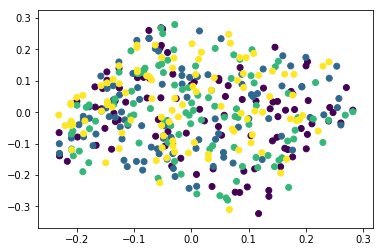

In [44]:
plt.scatter(z1, z2, c=df['price_range'])

### z-scoring

In [45]:
means = df_sub.mean()
std = df_sub.std()
df_z_scor = (df_sub - means) / std
df_z_scor.head()

,battery_power,clock_speed,talk_time
0,-0.187811,-0.135738,-1.070872
1,-1.108790,0.229477,-1.070872
2,1.427239,-1.231382,1.068198
3,-0.748407,0.838168,-1.427384
4,0.459544,0.107738,-1.249128


In [48]:
z, mu, c = np.linalg.svd(df_z_scor)

In [49]:
z1 = z[:,0] * np.sqrt(mu[0]) # надо умножать на корень из синг значения
z2 = z[:,1] * np.sqrt(mu[1])

In [50]:
p=100*(mu[0] ** 2 + mu[1] ** 2) / df_z_scor.multiply(df_z_scor).values.sum()
print('contribution to the vatiance:', p)

contribution to the vatiance: 69.58291363338208


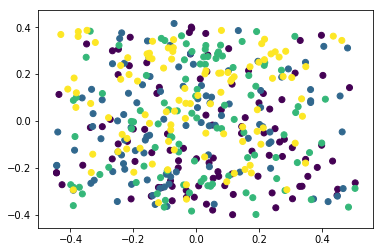

In [51]:
plt.scatter(z1, z2, c=df['price_range'])

## conventional pca

In [52]:
from matplotlib import pyplot as plt

cols = ['battery_power', 'clock_speed', 'talk_time']

df_sub = df[cols]
df_sub.head()

,battery_power,clock_speed,talk_time
0,1142,1.4,5
1,728,1.7,5
2,1868,0.5,17
3,890,2.2,3
4,1433,1.6,4


In [53]:
means = df_sub.mean()
std = df_sub.std()
df_z_scor = (df_sub - means) / std
df_z_scor.head()

,battery_power,clock_speed,talk_time
0,-0.187811,-0.135738,-1.070872
1,-1.108790,0.229477,-1.070872
2,1.427239,-1.231382,1.068198
3,-0.748407,0.838168,-1.427384
4,0.459544,0.107738,-1.249128


In [59]:
cov = np.array(df_z_scor.cov())
cov

array([[ 1.        , -0.0055036 , -0.00837743],
       [-0.0055036 ,  1.        , -0.08638591],
       [-0.00837743, -0.08638591,  1.        ]])

In [62]:
eigvals, eigvecs = np.linalg.eig(cov)
eigvals

array([0.91251259, 1.00105342, 1.08643399])

In [76]:
pc1 = (np.array(df_z_scor) @ eigvecs[:,2].reshape(-1,1)) / np.sqrt(len(df_z_scor) * eigvals[2])
pc2 = (np.array(df_z_scor) @ eigvecs[:,1].reshape(-1,1)) / np.sqrt(len(df_z_scor) * eigvals[1])

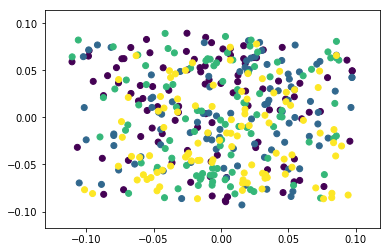

In [81]:
plt.scatter(pc1[:,0], pc2[:,0], c=df['price_range'])